# Analysis of the CaII line

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
# %matplotlib inline
from astropy.io import fits as f
import sunpy
from scipy.io import readsav
import cocopy as cp
from ISPy.io import solarnet
import sunpy.map
import astropy.units as u
from scipy.io import readsav as rs
from PIL import Image, ImageEnhance
import use_nessi as un
from importlib import reload
import matplotlib.animation as animation
from PIL import Image
from scipy.interpolate import interp1d
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.collections import PolyCollection


In [2]:
import sys
print('sys.path:', sys.path)

sys.path: ['e:\\solar flares\\data\\2017-09-06', 'c:\\Users\\Gebruiker\\Anaconda3\\python311.zip', 'c:\\Users\\Gebruiker\\Anaconda3\\DLLs', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib', 'c:\\Users\\Gebruiker\\Anaconda3', '', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib\\site-packages', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib\\site-packages\\win32', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib\\site-packages\\Pythonwin']


# functies uittesten met CaII

 thus falling back to mode='denywrite', which means that the array will be read-only [astropy.io.fits.file]


(1038, 1079) (1038, 1079)
Boundary
Blue=Outside, yellow=Inside


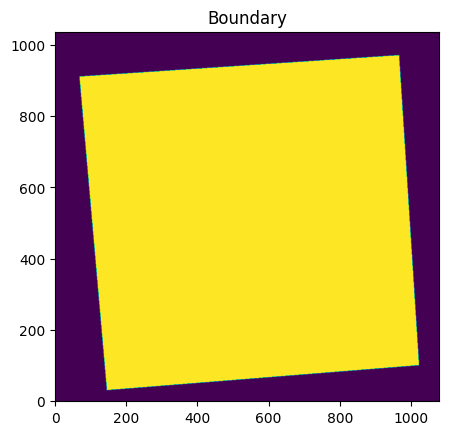

If there is still boundary left to be excluded, call self.second_boundary()
The next thing to do is to initalise the filters. Use update_filters(self, MeanSd, form='normal')
[30, 60] [1.70895653e-08 1.99073806e-08]
[631, 646] [2.33172465e-08 1.96068617e-08]
[194, 268] [1.7007815e-08 1.9887316e-08]
[298, 323] [1.18704154e-08 1.36761467e-08]
[472, 204] [1.53954859e-08 1.85800599e-08]
[30, 60] [1.77462844e-08 2.11367137e-08]
[631, 646] [1.63276036e-08 1.83728823e-08]
[194, 268] [1.87398272e-08 2.19730493e-08]
[298, 323] [1.37608445e-08 1.88029691e-08]
[472, 204] [1.60014118e-08 1.89450619e-08]
[30, 60] [1.73635257e-08 2.01355732e-08]
[631, 646] [1.65598206e-08 1.81437240e-08]
[194, 268] [1.78025171e-08 2.02848739e-08]
[298, 323] [8.66208392e-09 9.81781716e-09]
[472, 204] [1.43120893e-08 1.66008937e-08]
[30, 60] [1.71880643e-08 2.01337755e-08]
[631, 646] [1.63602767e-08 2.73891362e-08]
[194, 268] [1.83631043e-08 2.08478821e-08]
[298, 323] [8.24692183e-09 9.06941650e-09]
[472, 204] [1.45487

In [3]:
reload(un)
# %matplotlib widget
# print(np.shape(CaII.datacube))
# vertices = (1038,1079),[(20, 104),(77, 1020), (960,964), (900,48)] # boundary of the first frame
vertices2 = [(30, 145),(100, 1020), (970,964), (910,68)] # more restricted boundary to fit all frames.
CaII = un.SST_data(#'nb_8542_2017-09-06T09_04_20_09_04_20=0-200_mixed_stokes_corrected_im.fits',
                   'nb_8542_2017-09-06T11_55_47_scans=3-215_stokes_corrected_im_new.fits',
                   'spectfile8542_93.idlsave','times8542_93_2017_09_06_11_55_47.idlsave',
                   name_of_line='CaII17', boundary_methode='By_user',boundary_arguments=vertices2)

for frame in range(0,213,70):
    pixels=[[30,60],[631,646],[194,268],[298,323],[472,204]]
    for i in pixels:
        print(i, CaII.datacube[frame,0,::10,i[1],i[0]])

# # CaII.datacube
# plt.imshow(CaII.boundary[:,:])
# print(np.shape(CaII.boundary), np.shape(CaII.datacube))

s = np.sum(CaII.boundary)
areafactor = s/847550 * 60**2 / (np.pi*950**2)

print(s, 'persentage of frame kept:', s/847550, 'areafactor:', areafactor) # to account for a bit of extra non excluded pixels


# CaII.datacube[70,0,:,600,600]

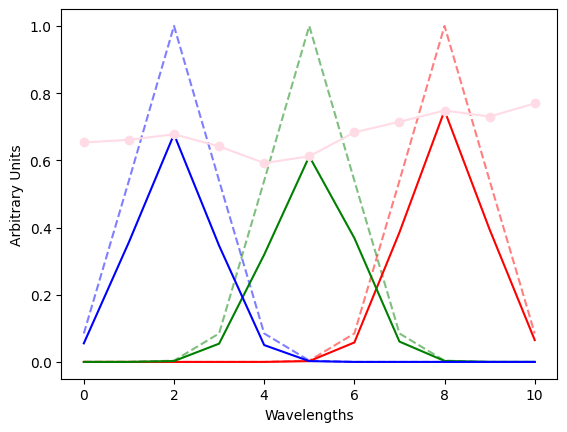

In [4]:
# %matplotlib inline
CaII.update_filters([[8,0.9], [5,0.9], [2,0.9]])
CaII.plot_filt(880,900)

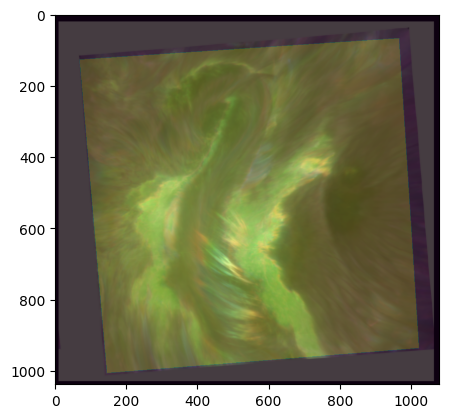

(1038, 1079, 3) (1038, 1079)


In [5]:
CaII.ccp_frame(70,Show=False)
plt.imshow(CaII.current_ccp[::-1,:])

plt.imshow(CaII.boundary[::-1,:], alpha=0.2)
plt.show()
print(np.shape(CaII.current_ccp[::-1,:]),np.shape(CaII.boundary[::-1,:]))

COCOPLOT at  t=11:55:57 UT (frame number 0 )


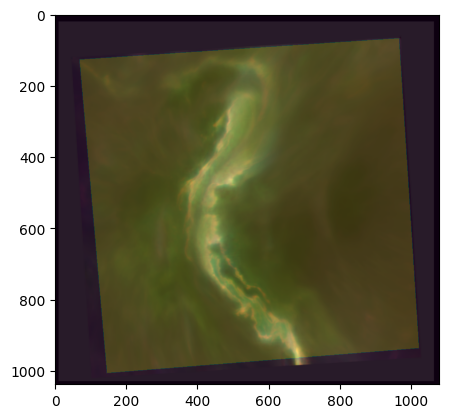

COCOPLOT at  t=12:05:56 UT (frame number 40 )


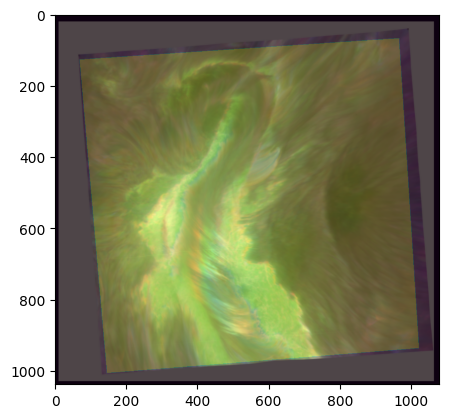

COCOPLOT at  t=12:15:55 UT (frame number 80 )


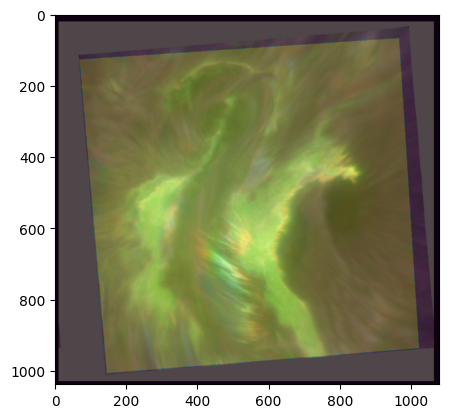

COCOPLOT at  t=12:25:53 UT (frame number 120 )


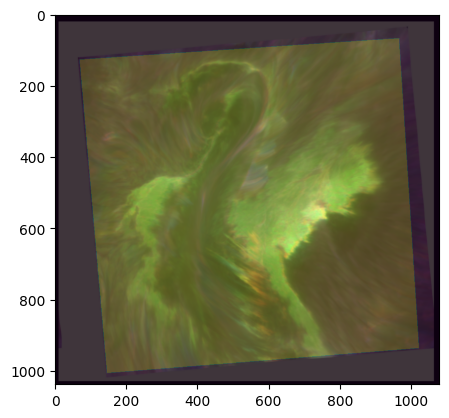

COCOPLOT at  t=12:35:52 UT (frame number 160 )


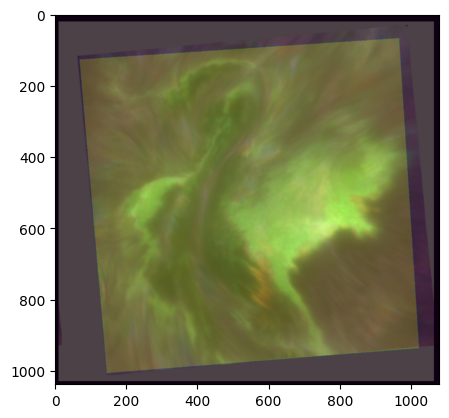

COCOPLOT at  t=12:45:51 UT (frame number 200 )


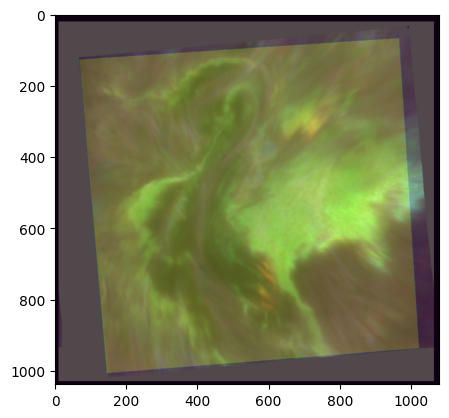

In [6]:
# Many COCOPLOTS
r = CaII._number_of_frames
for i in range(0,r,40):
    tstr = CaII.time_of_frame(i)
    print("COCOPLOT at ", tstr, "(frame number", i,")")
    CaII.ccp_frame(i,Show=False)
    plt.imshow(CaII.current_ccp[::-1,:])

    plt.imshow(CaII.boundary[::-1,:], alpha=0.2)
    plt.show()


COCOPLOT at  t=12:13:25 UT (frame number 70 )


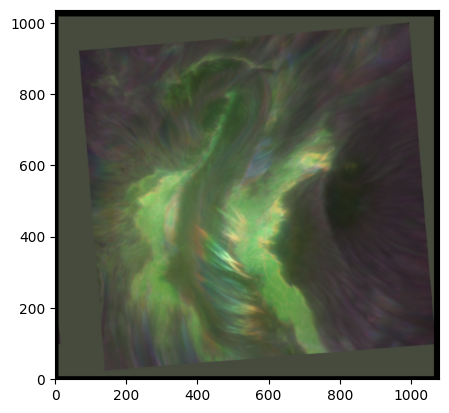

In [7]:
CaII.ccp_frame(70)
pixels=[[30,60],[631,646],[194,268],[298,323],[472,204]]
# CaII.current_ccp[0:30:5,0:60:5,:]

[[30, 60], [631, 646], [194, 268], [298, 323], [472, 204]]
frame: 0
[30, 60] 2.817815314415384e-09
[631, 646] -3.7103848593295212e-09
[194, 268] 2.8795010652081992e-09
[298, 323] 1.8057313804571286e-09
[472, 204] 3.1845739156819844e-09
frame: 40
[30, 60] 3.5481839688600336e-09
[631, 646] -4.6363293777710415e-10
[194, 268] 3.794289780490668e-09
[298, 323] 7.137378049346374e-09
[472, 204] 1.5850198286822697e-09
frame: 80
[30, 60] 3.321950714507693e-09
[631, 646] 2.5509764218916723e-09
[194, 268] 3.3369427327553484e-09
[298, 323] 5.20068176236463e-09
[472, 204] 2.9317798764035617e-09
frame: 120
[30, 60] 2.9097453335680224e-09
[631, 646] 2.7625113965985368e-09
[194, 268] 2.844675618865845e-09
[298, 323] 2.843341806308661e-09
[472, 204] 2.1408632620070884e-09
frame: 160
[30, 60] 2.6881306069981292e-09
[631, 646] 4.285839691765781e-09
[194, 268] 2.9030822190153794e-09
[298, 323] 1.689721858351651e-09
[472, 204] 2.1771540074955977e-09
frame: 200
[30, 60] 2.6536213226791006e-09
[631, 646] 5.56

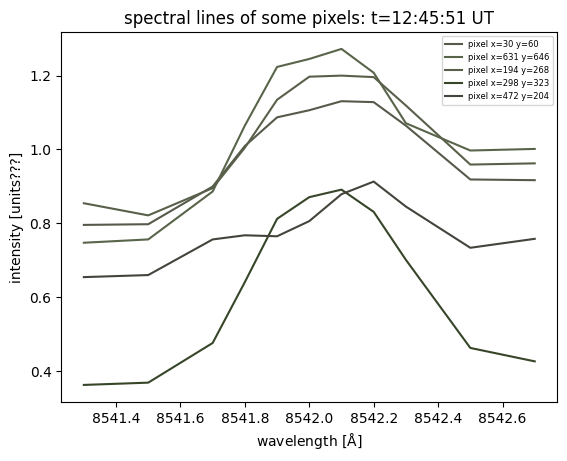

[8541.3 8541.5 8541.7 8541.8 8541.9 8542.  8542.1 8542.2 8542.3 8542.5
 8542.7] [-0.00000000e+00 -5.42795583e-10 -1.08559117e-09 -1.35698896e-09
 -1.62838675e-09 -1.89978454e-09 -2.17118233e-09 -2.44258013e-09
 -2.71397792e-09 -3.25677350e-09 -3.79956908e-09]
70


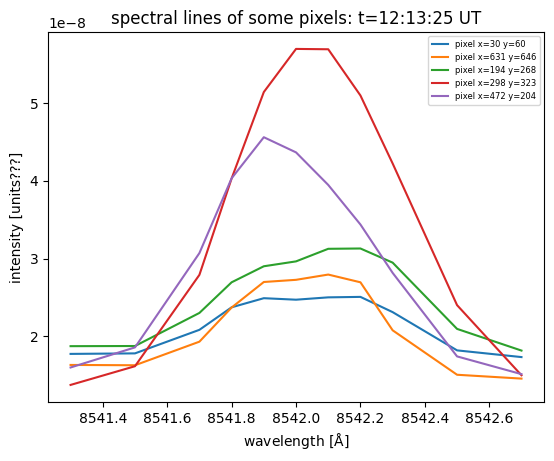

In [8]:
print(pixels)
x=[]
frame = 70
for frame in range(0,213,40):
    print('frame:',frame)
    for i in pixels:
        x.append(CaII.datacube[frame,0,10,i[1],i[0]] - CaII.datacube[frame,0,0,i[1],i[0]])
        print(i, x[-1])
CaII.interesting_pixels(frame, pixels, rand=False, numb=30)
mx = np.mean(x)
correction = - mx * (CaII._wavel - CaII._wavel[0])
print(CaII._wavel, correction)

frame = 70

print(frame)
colors = CaII.ccp_frame(frame,Show=False)

fig, ax = plt.subplots(1)
ax.set_title("spectral lines of some pixels: "+ CaII.time_of_frame(frame) )
for p in range(len(pixels)):
    ax.plot(CaII._wavel, CaII.datacube[frame,0, :, pixels[p][1], pixels[p][0]] + correction,
            label="pixel x="+str(pixels[p][0])+" y="+str(pixels[p][1]))
ax.set_xlabel(r"wavelength [$\rm\AA$]")
ax.set_ylabel("intensity [units???]")
ax.legend(fontsize=6)
plt.show()

In [9]:
print('1',end='\rt')
print('10 ',end='')
print('\r\r\r11 ',end='')
j=12
s = ''
for i in range(len(str(j))+1):
    s += '\r'
print(s, end=str(j))

12  

In [10]:
CaII.calculate__FOV_spect_over_time()

# try :
#     FOV_spectrum = np.load('FOV_spectrum_CaII.npy')
# except:
#     # time_av_spectrum = np.array([Ha.frame_integrated_spect(frame)/Ha.scalar for frame in range(213)])
#     FOV_spectrum=[]
#     for frame in range(np.shape(sst_data.datacube)[0]):
#         s=''
#         for i in range(len(str(frame))+1):
#             s += '\r'
#         print(s, end=str(frame))
#         FOV_spectrum.append(sst_data.frame_integrated_spect(frame)/sst_data.scalar)

#     FOV_spectrum = np.array(FOV_spectrum)
#     np.save('FOV_spectrum_CaII.npy', FOV_spectrum)
# np.shape(FOV_spectrum), sst_data.scalar

Make sure the following correction is added only once! However adding it a second time should not differ it.

In [11]:
# def add_correction(sst_data, FOV_spectrum, theoretical_difference):
#     if hasattr(sst_data, 'correction'):
#         print('the correction has already been done ')
#         return FOV_spectrum, sst_data.correction

#     mean_difference_observation = np.mean(FOV_spectrum[:,-1]-FOV_spectrum[:,0])
#     print(mean_difference_observation, theoretical_difference)

#     correction = -(mean_difference_observation - theoretical_difference) * (sst_data._wavel - sst_data._wavel[0])

#     FOV_spectrum = FOV_spectrum + correction
#     sst_data.correction = correction
#     return FOV_spectrum, correction

FOV_spectrum, correction = CaII.add_correction(theoretical_difference=0.03497400310369425)



In [12]:
print(correction)

[-0.         -0.03381729 -0.06763458 -0.08454323 -0.10145187 -0.11836052
 -0.13526916 -0.15217781 -0.16908645 -0.20290375 -0.23672104]


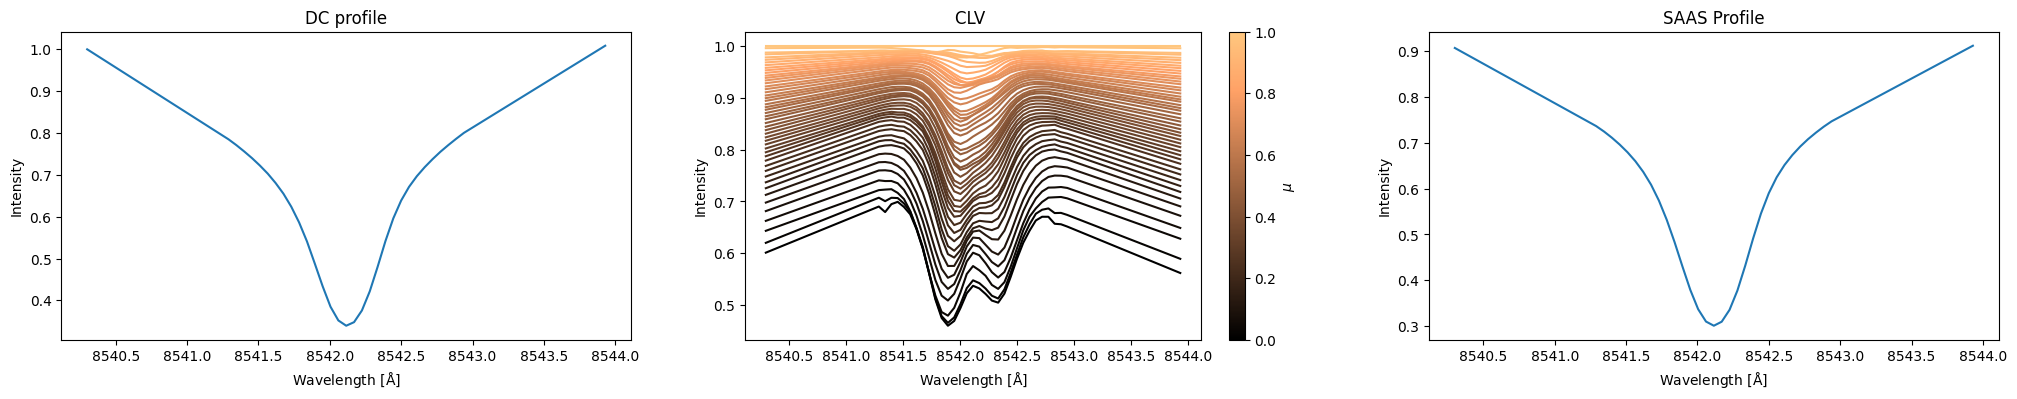

In [13]:
import use_nessi3 as un3
theor_CaII = un3.linestudier('8542_clv.fits', nr=101)


## Finding $\mu$

(213, 4, 11, 1038, 1079)
The frame is centered at (524.6951755526969, -235.1869288002494)
[500.87502555269697, 548.5153255526969, -267.62932880024937, -202.7445288002494]
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.7997209667453697 for timeframe 0
succesfully saved.
The frame is centered at (529.4665422492486, -232.5215139851784)
[505.64639224924866, 553.2866922492486, -264.96391398517835, -200.0791139851784]
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.7971482301738789 for timeframe 200
We take average mu to be  0.7984345984596244
Mu also set to the theoretic nessi line.


(0.7984345984596244, array([10], dtype=int64))

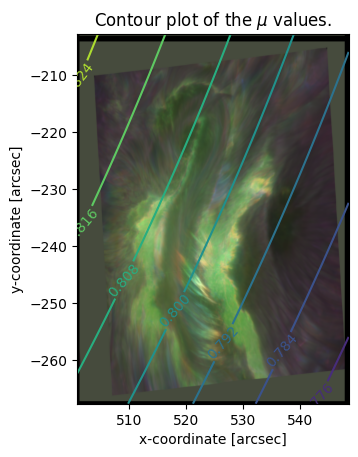

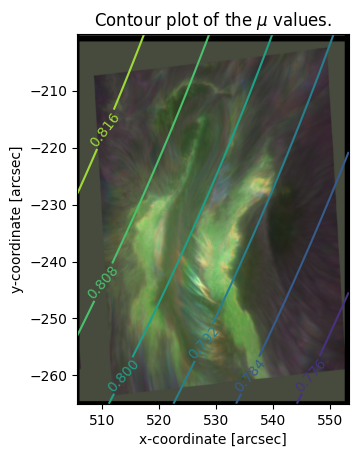

In [14]:
print(np.shape(CaII.datacube))
mu = CaII.set_mu(theor_line=theor_CaII, number_of_last_frame=200, 
                    alternative_filename='fits/nb_3950_2017-09-06T11_55_49_11_55_49=6-399_mixed_corrected_im.fits')
x = np.abs(theor_CaII.sst_mu-mu)
index_mu = np.where(x == np.min(x))[0]
mu, index_mu

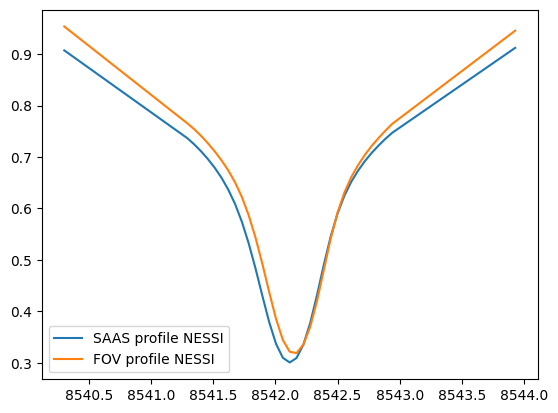

In [15]:
sst_data = CaII
theor_CaII.set_fov( sst_data.xx, sst_data.yy, sst_data.boundary, sr=959.63)

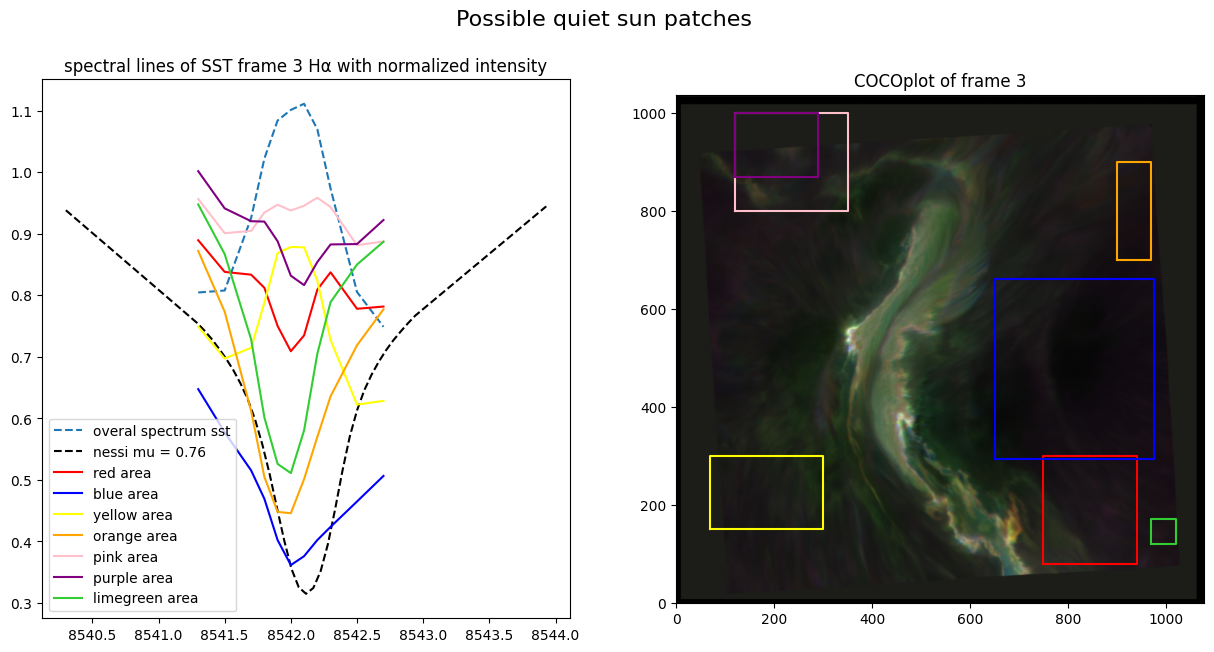

In [16]:
# %matplotlib widget
# %matplotlib inline
frame = 3

X = [[(750,940), (80,300)], [(650,975), (294,662)],[(70,300), (150,300)], [(900, 970), (700, 900)], [(120,350), (800,1000)] 
     , [(120,290), (870,1000)], [(970,1020),(120,170)]]
# X = [[(750,940), (230,300)], [(650,975), (294,662)],[(270,300), (250,300)], [(800, 900), (700, 900)], [(220,350), (700,800)] , [(220,290), (700,800)],]
#X=[[(600,602),(600,602)]]
CaII.possible_quiet_sun_patches(frame, theor_line = theor_CaII, X=X)


### The quiet sun patch

fill in here which color the wanted quiet sun patch had 

In [17]:
color_wanted_patch = 'limegreen'

the edges of the patch are denoted by the xlim: (970, 1020) and ylim: (120, 170)


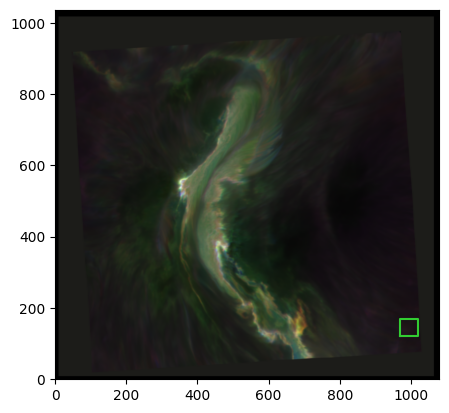

The quiet sun is pick at x (549.5965576945176, -255.9225893950144) with average              mu 0.775159430158545


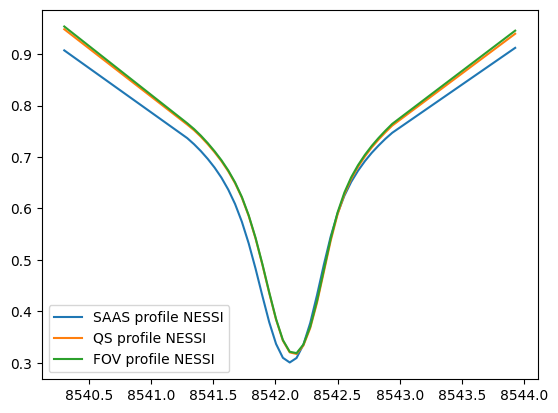

{'frame': 3, 'xlim': (970, 1020), 'ylim': (120, 170), 'color': 'limegreen'}

In [18]:
colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']
ind = colors.index(color_wanted_patch)

xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)

CaII.set_quiet_sun(frame, xlim=xlim, ylim=ylim, show=False, color=color_wanted_patch)

theor_CaII.set_quiet_sun(xlim=xlim, ylim=ylim, show=True)
CaII.quiet_sun

[8541.3 8541.5 8541.7 8541.8 8541.9 8542.  8542.1 8542.2 8542.3 8542.5
 8542.7] [0.94744466 0.86684066 0.72826305 0.60150788 0.52595682 0.51108001
 0.58044925 0.70487646 0.78875765 0.84988714 0.88689579] [0.76089572 0.71207076 0.63612722 0.57315796 0.48538806 0.38855461
 0.32656182 0.32630079 0.3857948  0.58849142 0.6937385 ]
the given inital guess is [-0.1249  0.8865]
[-0.1249  0.8865]
  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 5777480979.925728
        x: [-1.765e-01  1.387e+00]
      nit: 13
      jac: [ 0.000e+00  6.400e+01]
 hess_inv: [[ 1.007e-12 -3.934e-13]
            [-3.934e-13  3.960e-12]]
     nfev: 141
     njev: 43


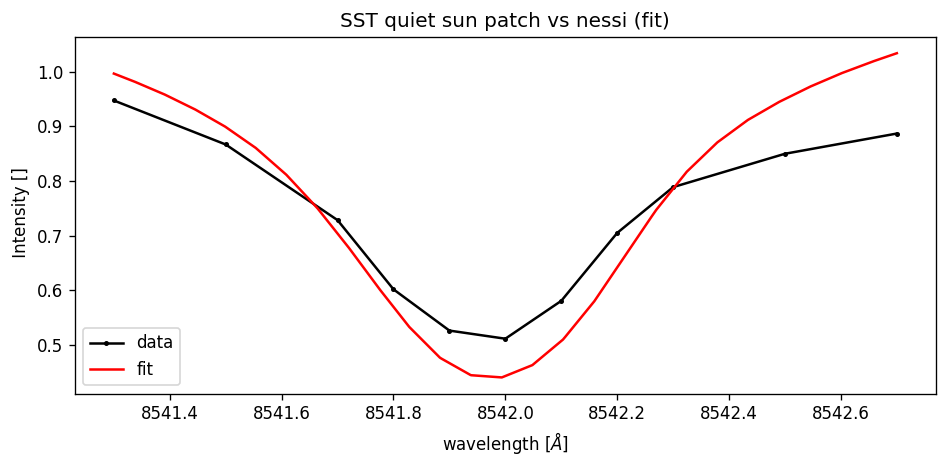

de p-waarde is  0.0 
Chi^2 reduced= 641942331.1028587 
aantal vrijheidgraden= 9 
chi^2= 5777480979.925728
we behouden de fit tot op een betrouwbaarheidsniveau van  0.0 
Oftewel verwerp als p-waarde <lpha-niveau 


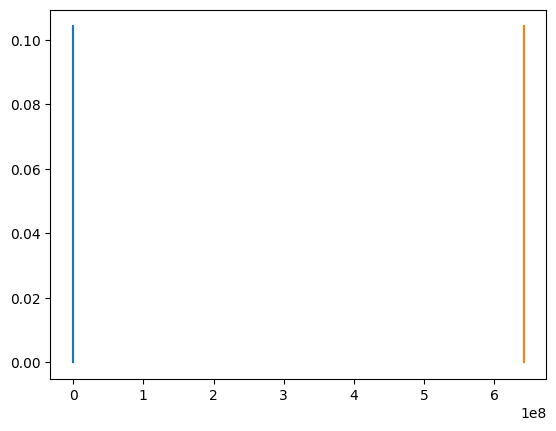

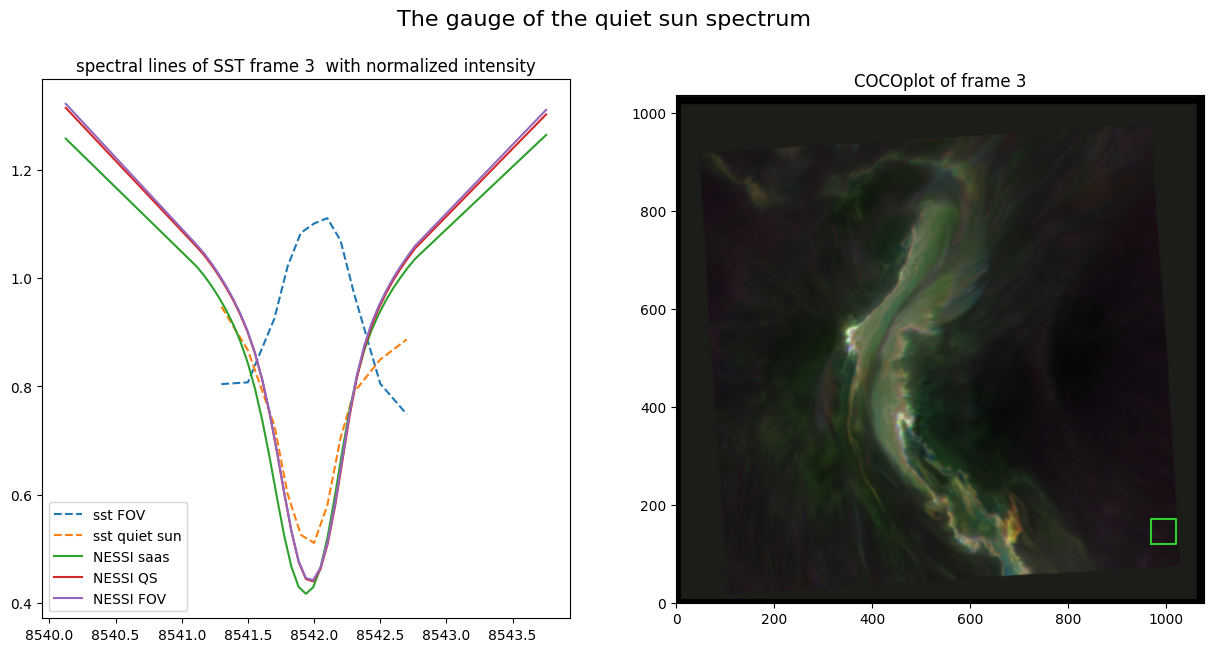

In [19]:
reload(un3)
un3.fit_qs_to_NESSI(theor_CaII, CaII, initial_guess=np.array([-1.249e-01 , 8.865e-01]))

In [20]:
# mini, f_nessi_theta, f_nessi_clv_theta = CaII.fit_nessi_to_quiet_sun( theor_line = theor_CaII, mu_data=0.7984345984596244,
#                                                                      initial_values=np.array([-2.349e-01 , 5.072e-01,  8.865e-01]))

frame: 0, b'11:55:57.689173', total number of frames: 213


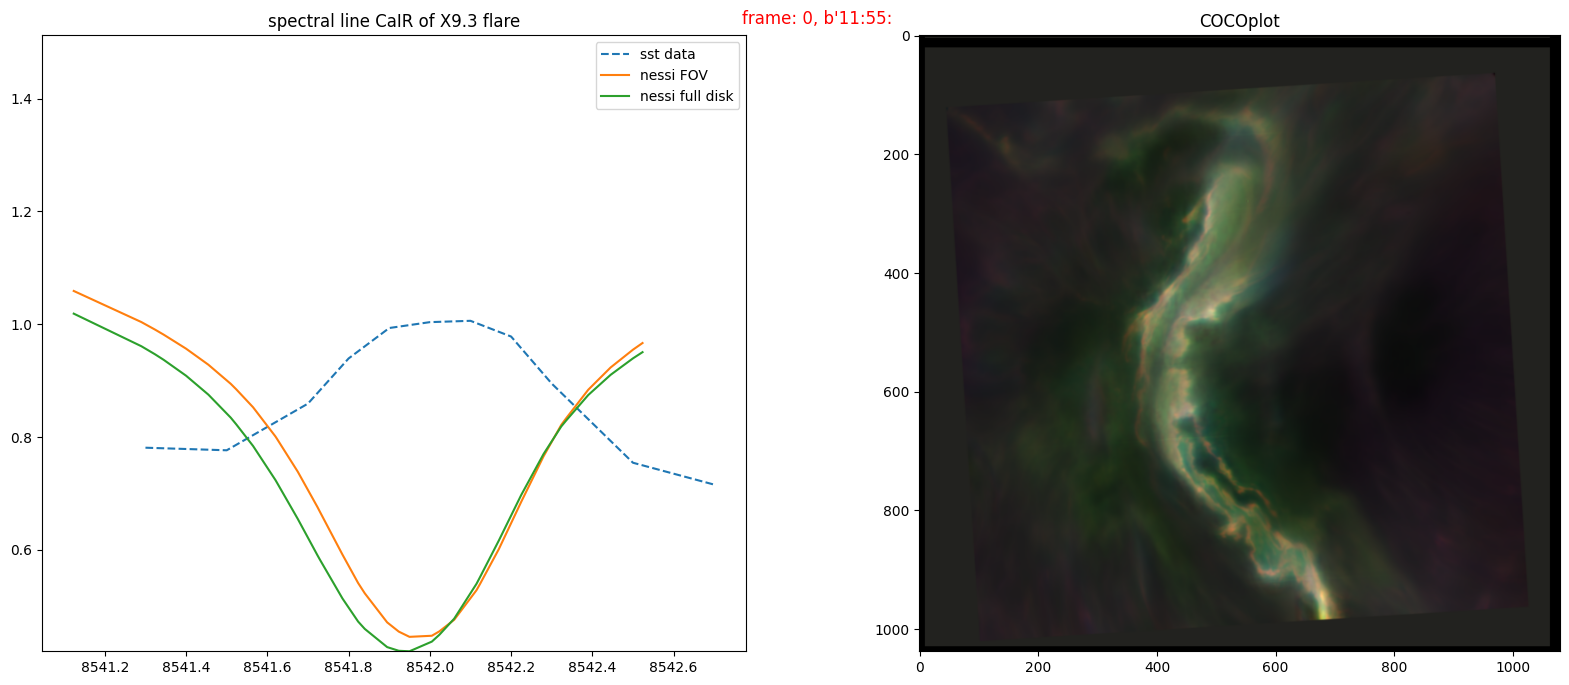

0 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 

In [24]:
reload(un)
un.Movie_making(theor_CaII, CaII, "X9.3", "CaIR")

frame: 60, b'12:10:55.786288'


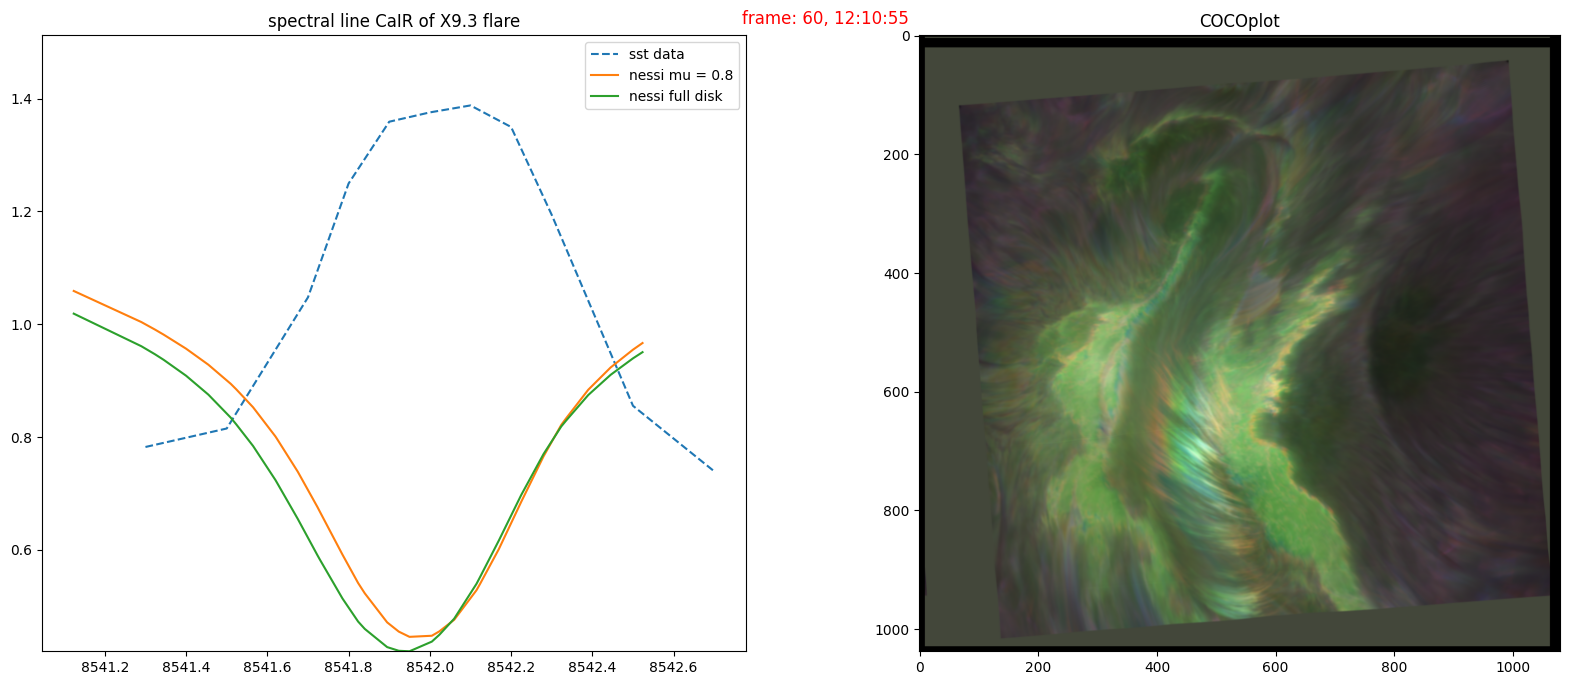

frame: 0, b'11:55:57.689173'


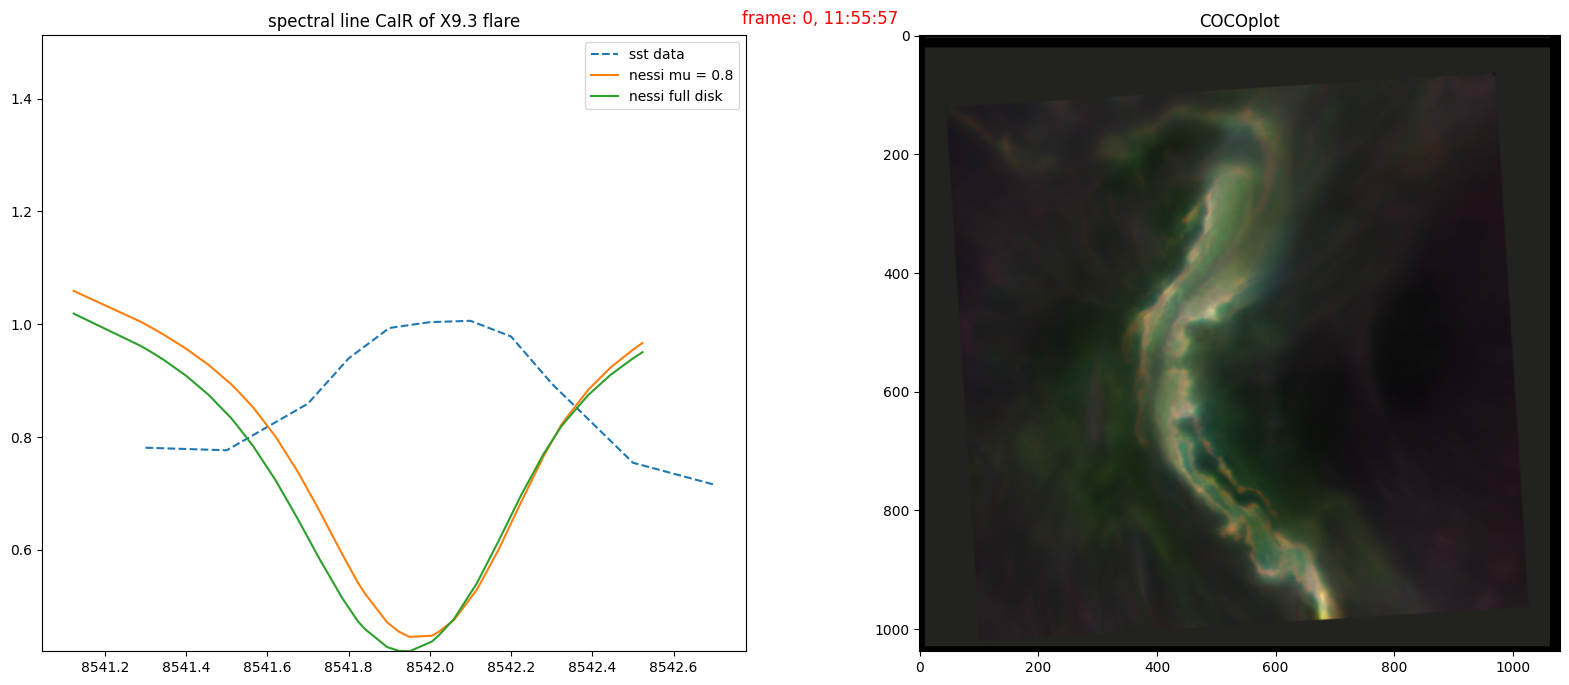

In [21]:
# # %matplotlib widget
# theor_line = theor_CaII
# sst_data = CaII
# theta = sst_data.theta_nessi_to_quiet_sun
# theta[1] = theta[2]
# name_of_flare = "X9.3"
# name_of_line = "CaIR"

# f_nessi_qs = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[1] * theor_line.spectr_qs 
#                                 , kind='linear', fill_value="extrapolate")
# f_nessi_fov = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[1] * theor_line.spectr_fov 
#                                 , kind='linear', fill_value="extrapolate")
# f_nessi_saas = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[1] * theor_line.saas_profile 
#                                 , kind='linear', fill_value="extrapolate")

# # f_nessi_clv = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc*theor_line.sst_clv[12] + theta[1]
# #                                   , kind='linear', fill_value="extrapolate")
# # f_nessi = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc + theta[1]
# #                                   , kind='linear', fill_value="extrapolate")
# # f_sst = interp1d(sst_data._wavel, sst_data.av_spect/sst_data.scalar, kind='linear', fill_value="extrapolate")

# # print(sst_data._wavel, theor_line.sst_wav+ sst_data.theta_nessi_to_quiet_sun[0])
# wav = un.merge_wavelengths(sst_data._wavel+ theta[0], theor_line.sst_wav)


# area_weight = 60**2 / (np.pi*950**2)

# def derive_intensity_lim(sst_data, mins = [], maxs = []):
#     n = sst_data._number_of_frames   
    
#     for frame in range(0, n, n//10):
#         sst_data.frame_integrated_spect(frame)
#         mins.append(np.min(sst_data.av_spect))
#         maxs.append(np.max(sst_data.av_spect))
        
#     return np.min(np.array(mins)), np.max(np.array(maxs))
    

# def frame_visualization(sst_data, frame, theta):
#     fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20, 8)) #, gridspec_kw={'height_ratios': [5, 1], "width_ratios":[1,1.2]})

#     sst_data.ccp_frame(frame,Show=False)
#     a=sst_data.current_ccp

#     ax[0].set_title(f"spectral line {name_of_line} of {name_of_flare} flare")
#     sst_data.frame_integrated_spect(frame)
#     line_sst, = ax[0].plot(sst_data._wavel, sst_data.av_spect, '--', label='sst data')
#     ax[0].plot(wav , f_nessi_fov(theta)(wav), label=f'nessi mu = {round(mu, 2)}')
#     ax[0].plot(wav, f_nessi_saas(theta)(wav), label='nessi full disk')
#     ax[0].legend()
#     limit = derive_intensity_lim(sst_data, 
#                                  mins=[np.min(f_nessi_saas(theta)(wav)), np.min(f_nessi_fov(theta)(wav))],
#                                  maxs=[np.max(f_nessi_saas(theta)(wav)), np.max(f_nessi_fov(theta)(wav))])
#     ax[0].set_ylim(limit)

#     im = ax[1].imshow(Image.fromarray(sst_data.current_ccp[::-1,:]))
#     ax[1].set_title(f"COCOplot")
#     text = ax[1].text(
#         -300, -20, f"frame: {str(frame)}, {str(sst_data._time[frame])[2:10]}", fontsize=12, color='red'
#     )
#     print(f"frame: {str(frame)}, {sst_data._time[frame]}")

#     plt.show()

#     return fig, line_sst,  im, text

# for frame in [60, 0]:
#     frame_visualization(CaII, frame, sst_data.theta_nessi_to_quiet_sun)

frame: 0, b'11:55:57.689173'


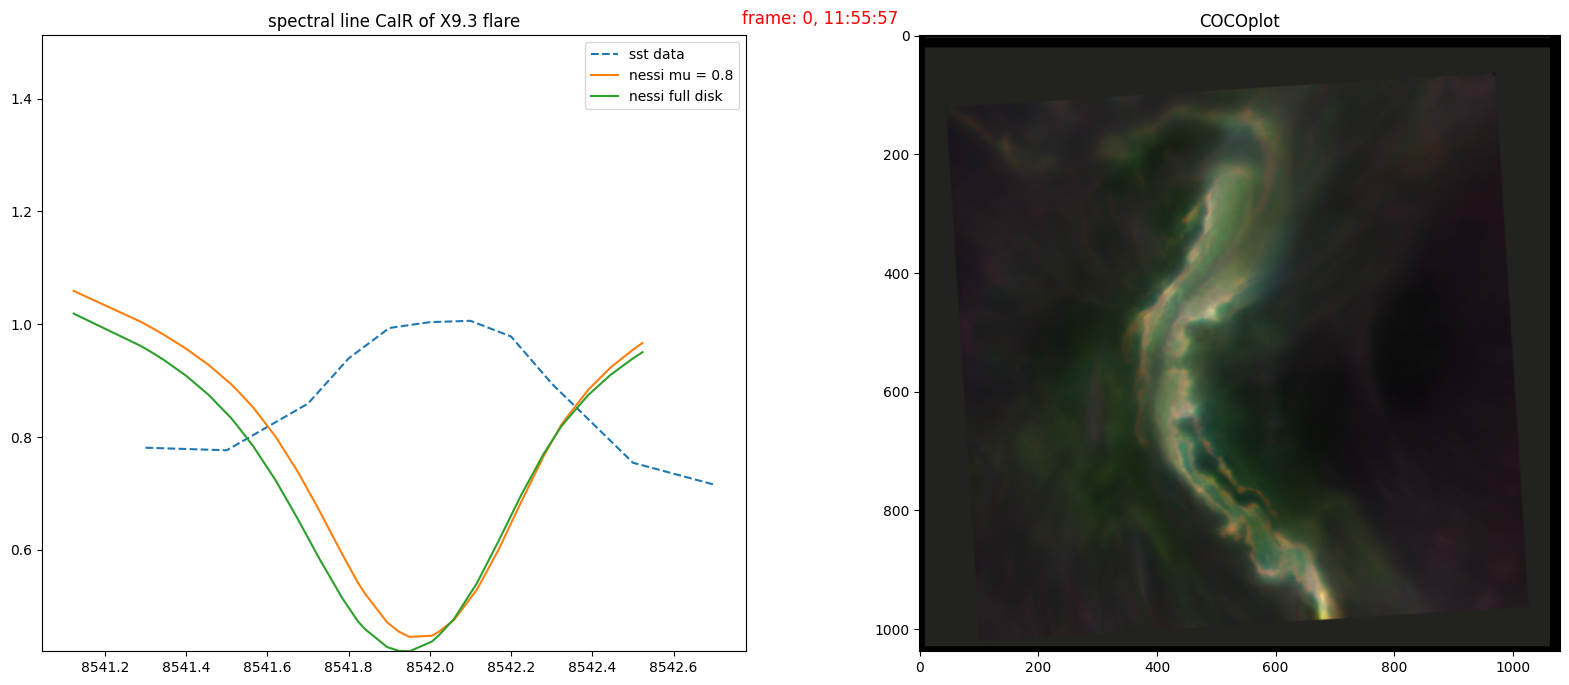

In [22]:
# # %matplotlib inline

# fps = 6
# nSeconds = 5
# frame = 0
# sst_data = CaII

# fig, line_sst, im, text, = frame_visualization(sst_data, frame, sst_data.theta_nessi_to_quiet_sun)

# # animation function.  This is called sequentially
# def animate(i):
#     step = 1 # step of number of frames. How to step through the frames, at which rate.
#     frame = np.min([step * i, 212])

#     x = sst_data._wavel
#     y = sst_data.frame_integrated_spect(frame)
#     f_sst2 = interp1d(sst_data._wavel, y, kind='linear', fill_value="extrapolate")
#     line_sst.set_data(x, y)

#     print(frame, end=" ")


#     text.set_text(f"frame: {str(frame)}, {str(sst_data._time[frame])[2:10]}")
#     # text = ax[1].text(
#     #     -300, -20, f"frame: {str(frame)}, {str(sst_data._time[frame])[2:10]}", fontsize=12, color='red'
#     # )    
#     sst_data.ccp_frame(frame,Show=False)
#     a = sst_data.current_ccp
#     im.set_array(Image.fromarray(a[::-1,:]))
#     return line_sst, [im], text



In [23]:

# # call the animator.  blit=True means only re-draw the parts that have changed.
# anim = animation.FuncAnimation(fig, animate,
#                                frames=212 , interval=500) #sst_data._number_of_frames



In [26]:
# # save the animation as an mp4.  This requires ffmpeg or mencoder to be
# # installed.  The extra_args ensure that the x264 codec is used, so that
# # the video can be embedded in html5.  You may need to adjust this for
# # your system: for more information, see
# # http://matplotlib.sourceforge.net/api/animation_api.html
# anim.save(f'E:/solar flares/data/animations/{name_of_flare.replace(".", "")}_{name_of_line}_animation.mp4', fps=fps, extra_args=['-vcodec', 'libx264'])
# theta[1] = 0

0 0 

KeyboardInterrupt: 

# saving Important small files for further analysis
We want the following:

* FOV_spectrum
* quiet_sun spectrum (nessi of qs)
* Full disk profile

The peak occurs at frame [28] at time t=[b'12:02:56 UT.


ValueError: theta[1]=1.386712675640436 should be zero!

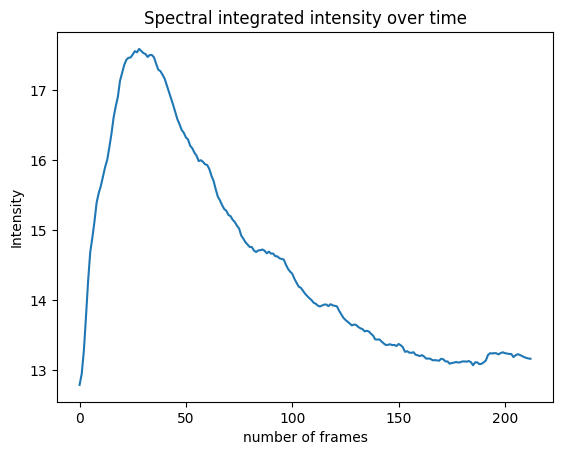

In [25]:
un.save_for_further_analysis(CaII, theor_CaII)
import numpy as np
import use_nessi as un

filename = un.get_file_path_line_data("TIME_CaII17")
TIME = np.load(filename)
print(np.shape(TIME))
if np.shape(TIME)[0] > 213:
    print("We change it")
    TIME = TIME[3:216]
    np.save(filename, TIME)